# Analisis dinamico modal espectral
Modelado con uso de `API de CSi` y `Python`

In [21]:
# !pip install numpy matplotlib pandas comtypes

In [22]:
import os, sys, ctypes
import numpy as np
import pandas as pd

import comtypes.client
from matplotlib import pyplot as plt

### 1. Uso de sistema de Unidades

In [23]:
# Unidades Base mks
m = 1
kg = 1
s = 1

# Otras Unidades
cm = 0.01*m
kgf = 9.80665*kg*m/s**2
tonf = 1000*kgf

# Constantes Físicas
g = 9.80665*m/s**2

# configuraciones de unidades
kN_m_C = 6
kgf_m_C = 8
Tonf_m_C = 12

### 2. Propiedades, materiales y geometria o modelo

#### Ejemplo-01

In [ ]:
fc = 210 * (kg/cm**2)   # Concrete strength [kg/cm2]
E = 151 * fc **0.5 *(kgf/cm**2)
v = 0.2
G = 0.5 *E / (1+v) # Shear modulus [kgf/cm**2]
coeficienteTermico = 0

material_type = 2;
material_name = f'fc={str(fc)} kg/cm^2'; # fc=280kg/cm^2

# --- secciones para la viga y columna
secBeamb = 30*cm # cm
secBeamh = 60*cm # cm
beamName = f'V{str(secBeamb)}x{str(secBeamh)}'
secColumnb = 60*cm # cm
secColumnh = 60*cm # cm
columnName = f'C{str(secColumnb)}x{str(secColumnh)}'
# Densidad del concreto
ρ = 2400*kg/m**3


# vertices o coordenadas
#   coords[x,y,z]
coords = pd.read_excel('data/modelo-02.xlsx', sheet_name='nodos')
coords = coords.to_numpy(dtype = np.float64)
# miembros o elementos
#   elems[node_i, node_j, columna o viga]
elems =  pd.read_excel('data/modelo-02.xlsx', sheet_name='elementos')
elems = elems.to_numpy(dtype = np.float64)
# Restricciones o condiciones de 
#   apoyos[idNode, Fx, Fy, Fz, Rx, Ry, Rz]
apoyos = np.array([
    [0, True, True, True, True, True, True],
    [3, True, True, True, True, True, True],
    [6, True, True, True, True, True, True],
    [9, True, True, True, True, True, True],
    [12, True, True, True, True, True, True],
    [15, True, True, True, True, True, True],
    [18, True, True, True, True, True, True],
    [21, True, True, True, True, True, True],
]);

# # cargas puntual
# #   cargaPuntual[idNodo, Fx, Fy, Fz, Rx, Ry, Rz]
# cargaPuntual = np.array([
#     [3, 0,0,-10,0,0,0],
#     [5, 0,0,-10,0,0,0]
# ])
# # carga distribuidas
# #   cargasDistr[idElem, node_i, node_j, F/L, [1:g,2:r,3:b], i, j, tipoCarga, node_i, node_j, F/L, [1:g,2:r,3:b], i, j, tipoCarga]
# cargasDistr = np.array([
#     [3, -0.4, -0.4, 1, 2, 0, 1, "Dead", -0.4, -0.4, 1, 2, 0, 1, "Live"],
#     [4, -0.4, -0.4, 1, 2, 0, 1, "Dead", -0.25, -0.25, 1, 2, 0, 1, "Live"]
# ])

nn = np.shape(coords)[0]
ne = np.shape(elems)[0]


nameModelProject = 'Edificio de 2 Niveles Irregular'
# Indicar el programa a usar
connect_to = 1; #1 para SAP2000 y 2 para ETABS
# Variable para definir una instancia manual para el programa y definir la ruta.
rutaEspecifica = False
if rutaEspecifica:
    ruta_app = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe" if connect_to else "C:\\Program Files\\Computers and Structures\\ETABS 21\\ETABS.exe"
else: ruta_app = None

#### Ejemplo-02

In [25]:
# # --- Propiedades
# fc = 280*kg/cm**2           # Resistencia a la compresion
# E = 150*fc**0.5*kgf/cm**2   # Modulo de elasticidad
# v = 0.2
# G = 0.5*E/(1+v)             # Modulo de corte
# coeficienteTermico = 0.0000055 #T

# material_type = 2;
# material_name = f'fc={str(fc)} kg/cm^2'; # fc=280kg/cm^2


# # --- secciones para la viga y columna
# secBeamb = 30*cm # cm
# secBeamh = 60*cm # cm
# beamName = f'V{str(secBeamb)}x{str(secBeamh)}'
# secColumnb = 45*cm # cm
# secColumnh = 45*cm # cm
# columnName = f'C{str(secColumnb)}x{str(secColumnh)}'
# # Densidad del concreto
# ρ = 2400*kg/m**3


# # vertices o coordenadas
# #   coords[x,y,z]
# coords = pd.read_excel('data/modelo-01.xlsx', sheet_name='nodos')
# coords = coords.to_numpy(dtype = np.float64)
# # miembros o elementos
# #   elems[node_i, node_j, columna o viga]
# elems =  pd.read_excel('data/modelo-01.xlsx', sheet_name='elementos')
# elems = elems.to_numpy(dtype = np.float64)
# # Restricciones o condiciones de 
# #   apoyos[idNode, Fx, Fy, Fz, Rx, Ry, Rz]
# apoyos = np.array([
#     [0, True, True, True, True, True, True],
#     [1, True, True, True, True, True, True],
#     [2, True, True, True, True, True, True],
#     [3, True, True, True, True, True, True],
#     [4, True, True, True, True, True, True],
#     [5, True, True, True, True, True, True],
#     [6, True, True, True, True, True, True],
#     [7, True, True, True, True, True, True],
#     [8, True, True, True, True, True, True],
#     [9, True, True, True, True, True, True],
#     [10, True, True, True, True, True, True],
#     [11, True, True, True, True, True, True]
# ]);
# # cargas puntual
# #   cargaPuntual[idNodo, Fx, Fy, Fz, Rx, Ry, Rz]
# cargaPuntual = np.array([
#     [3, 0,0,-10,0,0,0],
#     [5, 0,0,-10,0,0,0]
# ])
# # carga distribuidas
# #   cargasDistr[idElem, node_i, node_j, F/L, [1:g,2:r,3:b], i, j, tipoCarga, node_i, node_j, F/L, [1:g,2:r,3:b], i, j, tipoCarga]
# cargasDistr = np.array([
#     [3, -0.4, -0.4, 1, 2, 0, 1, "Dead", -0.4, -0.4, 1, 2, 0, 1, "Live"],
#     [4, -0.4, -0.4, 1, 2, 0, 1, "Dead", -0.25, -0.25, 1, 2, 0, 1, "Live"]
# ])

# nn = np.shape(coords)[0]
# ne = np.shape(elems)[0]


# nameModelProject = 'Edificio de 3 Niveles Irregular'
# # Indicar el programa a usar
# connect_to = 1; #1 para SAP2000 y 2 para ETABS
# # Variable para definir una instancia manual para el programa y definir la ruta.
# rutaEspecifica = False
# if rutaEspecifica:
#     ruta_app = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe" if connect_to else "C:\\Program Files\\Computers and Structures\\ETABS 21\\ETABS.exe"
# else: ruta_app = None

#### plotModel

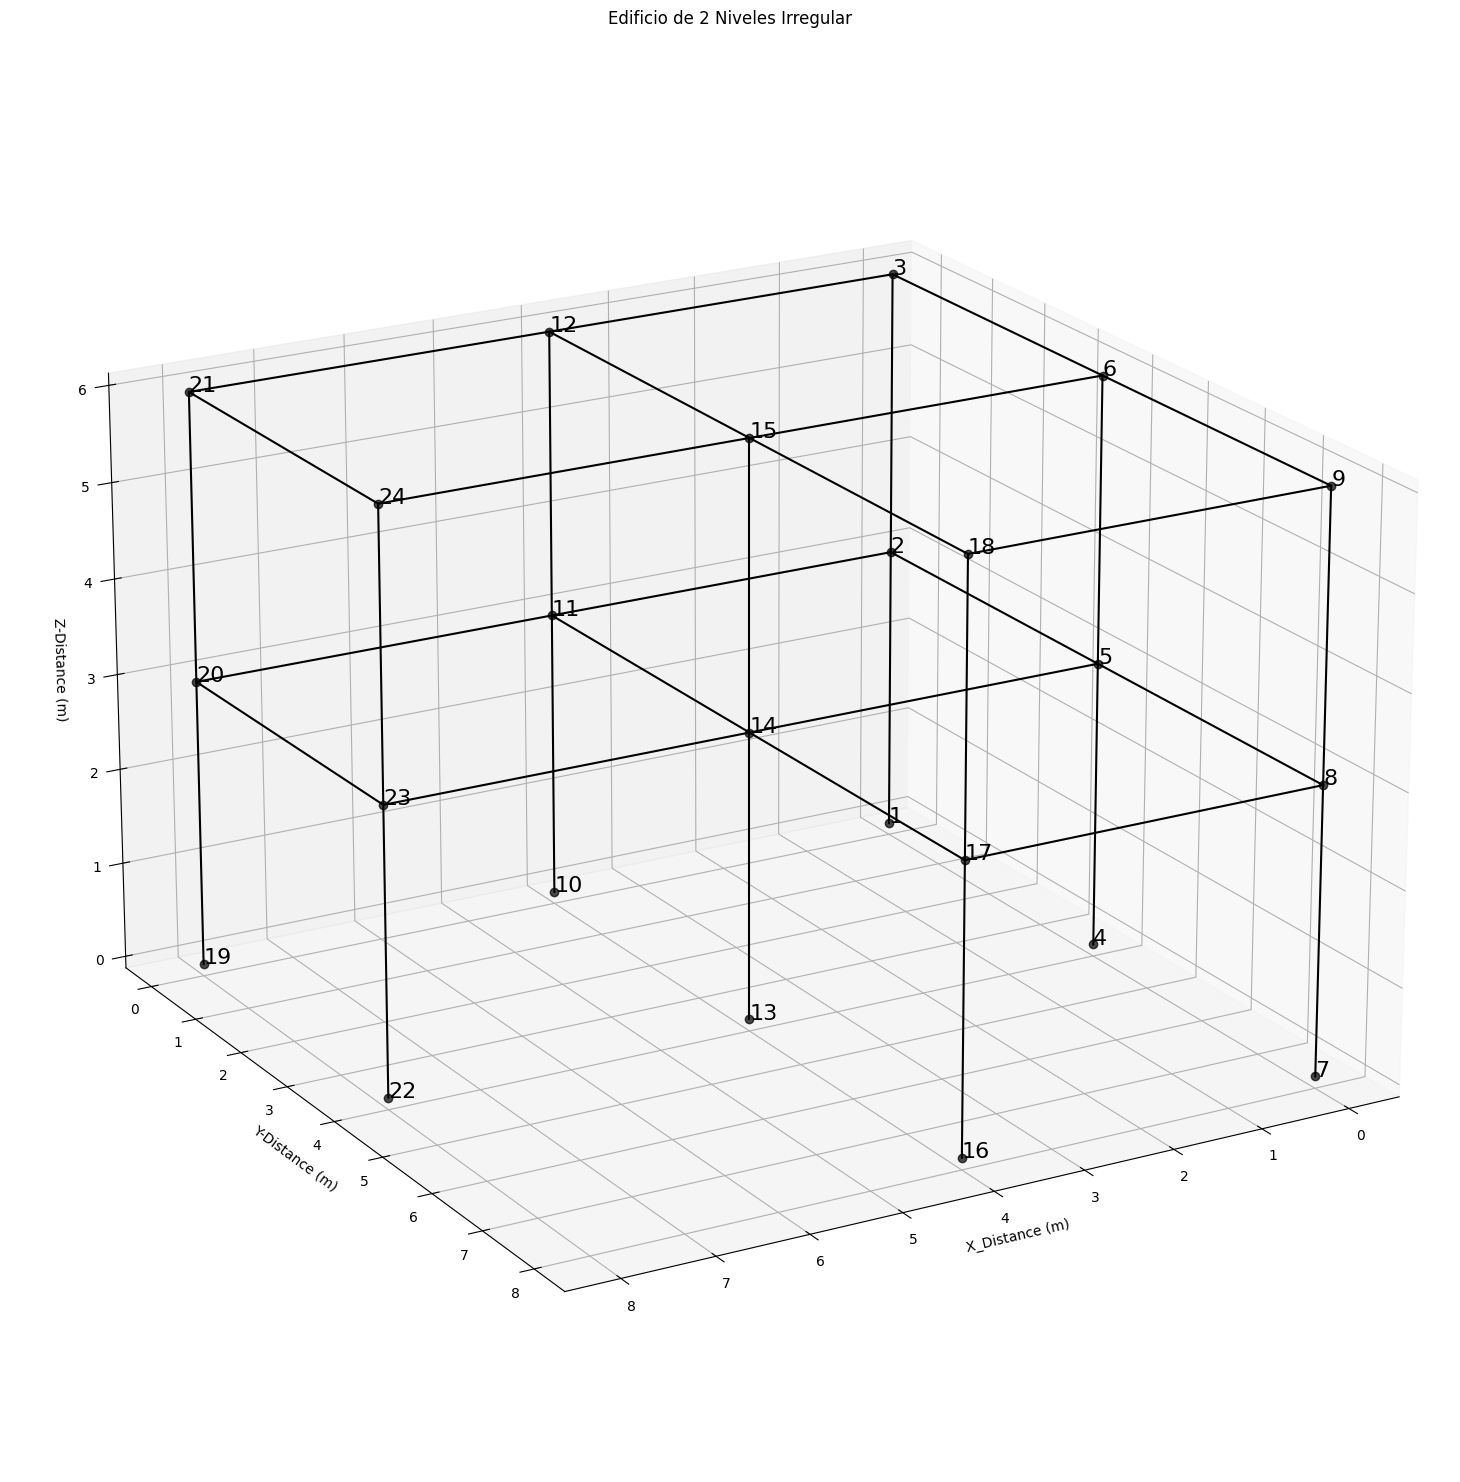

In [26]:
from utilities.plotModel import plotModel3d

plotModel3d(coords, elems, nameModelProject)

### 3. Coneccion

In [29]:
smodel, ret = None, None
conn = {};
app_csi = None
if connect_to == 1:  # SAP2000
    app_csi = "SAP2000"
    conn = {
        'app_ruta': ruta_app,
        'app_adjunto': "CSI.SAP2000.API.SapObject",
        'app_helper': 'SAP2000v1.Helper'
        }
elif (connect_to == 2): # ETABS
    app_csi = "ETABS"
    conn = {
        'app_ruta': ruta_app,
        'app_adjunto': "CSI.ETABS.API.ETABSObject",
        'app_helper': "ETABSv1.Helper"
        }
else: 
    print("No tenemos soporte aun")
    sys.exit()

In [30]:
try:
    connect_to_app = comtypes.client.GetActiveObject(conn['app_adjunto'])
    print("Coneccion exitosa!.\nadjuntando a una instancia existente.")
except (OSError, comtypes.COMError):
    print(f"No se encontró ninguna instancia en ejecución del programa({app_csi}).")

    print("Tratando de Ejecutar!.")
    #create API helper object
    helper = comtypes.client.CreateObject(conn['app_helper'])
    if connect_to == 1:
        helper = helper.QueryInterface(comtypes.gen.SAP2000v1.cHelper)
    else:
        helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper);
    # helper = comtypes.client.CreateObject(conn['app_helper']).QueryInterface()
    if rutaEspecifica: # para versiones anteriores a la ultima version instalada
        ProgramPath = conn['app_ruta'];
        try:
            connect_to_app = helper.CreateObject(ProgramPath)
            print("Coneccion establecida!.\nConexion Manual")
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program from " + ProgramPath)
            sys.exit(-1)
    else:
        try: 
            connect_to_app = helper.CreateObjectProgID(conn['app_adjunto']) 
            print("Coneccion establecida!.")
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program.")
            sys.exit(-1)
    print("Ejecutando!.  ultima version instalada o existente")
    #start ETABS application | ejecutar la Aplicacion ETABS.
    connect_to_app.ApplicationStart()

smodel = connect_to_app.SapModel;

No se encontró ninguna instancia en ejecución del programa(SAP2000).
Tratando de Ejecutar!.
Coneccion establecida!.
Ejecutando!.  ultima version instalada o existente


### 4. Se crea un nuevo Lienzo y Modelo

In [ ]:
# Unit Preferences | Preferencias de Sistema de Unidades
# .... en la parte de unidades se define las medidadas ...

In [31]:
smodel.SetPresentUnits(kN_m_C)
# get present units | Optener la presente unidad(s)
print(smodel.GetPresentUnits())

6


In [32]:
smodel.SetModelIsLocked(False)

# Se crea un nuevo lienzo
# smodel.InitializeNewModel; # esto es valido tambien
smodel.InitializeNewModel(Tonf_m_C)

if app_csi == "ETABS":
    # # create grid-only template model | Crea una nueva hoja con grilla
    response_status = smodel.File.NewGridOnly(3, 3*m,3*m, 5*m,4*m, 4*m,4*m)
else:
    response_status = smodel.File.NewBlank()

response_status

0

In [33]:
smodel.View.RefreshView(0, False);

### modificndo las grillas

#### by ETABS

**Crear una nueva grilla**

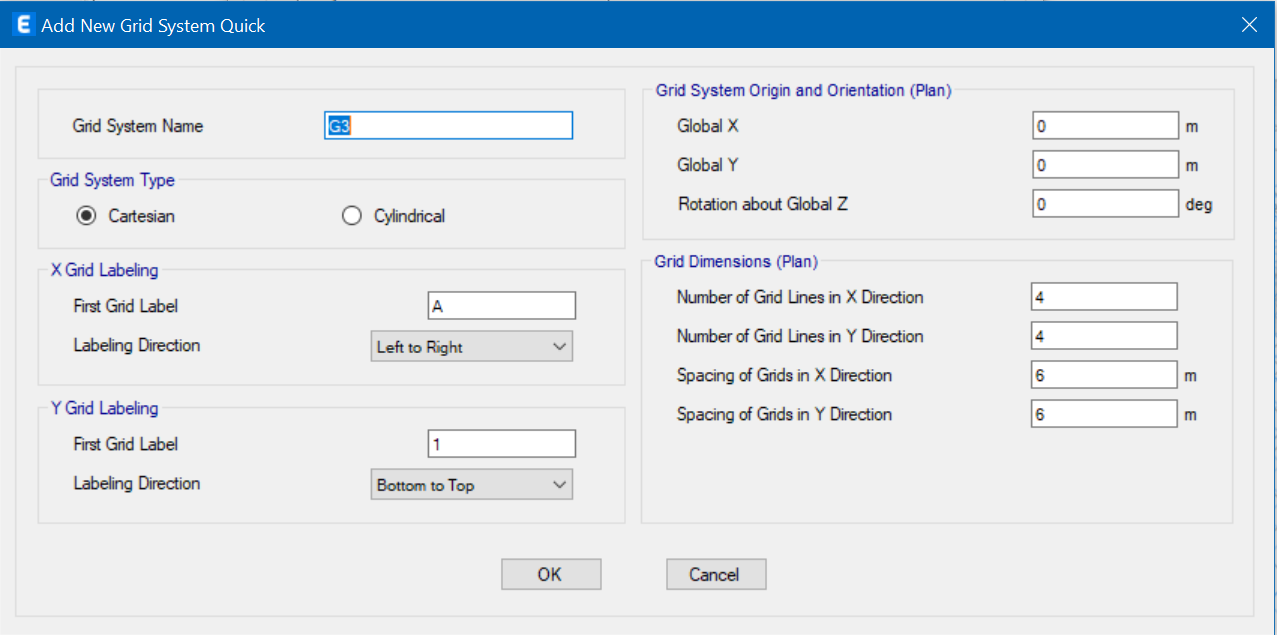

C#
```c#
int GetGeometricNonlinearity(
	string Name,
	ref int NLGeomType
)
```
python
```py
int GetGeometricNonlinearity(
	Name -> str,
	NLGeomType -> int
) -> int
```


#### by SAP2000

No se usa grillas

#### code

In [ ]:
# # 'define new grid system - SetGridSys['Grid system Name', 'Global X', 'Global Y', 'Rotation about Global Z']
# response_status = smodel.GridSys.SetGridSys("G2", 0,0,0)
# display(response_status)

# # 'get new grid system data
# response_status = smodel.GridSys.GetGridSys("G1", 0, 0, 0)
# display(response_status)

In [ ]:
# Xo, Yo, RZ = .0, .0, .0
# NumXLines, NumYLines = 0,0
# GridLineIDX, GridLineIDY = [], []
# OrdinateX, OrdinateY = [],[]
# VisibleX, VisibleY = [], []
# BubbleLocX, BubbleLocY = [], []
# response_status = smodel.GridSys.GetGridSys_2(Name, Xo,Yo,RZ, '', NumXLines,NumYLines, GridLineIDX,GridLineIDY, OrdinateX,OrdinateY, VisibleX,VisibleY, BubbleLocX,BubbleLocY)
# display(response_status)

In [ ]:
# # tipo de grilla Cartesian o Cylindrical
# Name, GridSysType = 'G2', ''
# nameGridSystem = smodel.GridSys.GetGridSysType(Name,GridSysType)[0]
# display(nameGridSystem)

In [ ]:
# NumberNames, MyName = 0, ''
# infoPisos = smodel.Story.GetNameList(NumberNames, MyName)
# numPisos = infoPisos[0]

# alturaPisos, PisoMaestro, pisoSimilares = [], [], []
# espcioAltura, = [],
# for i in range(numPisos):
#     nameStory = infoPisos[1][i]
#     # altura por piso
#     Height = .0
#     alturaPiso = smodel.Story.GetHeight(nameStory, Height)
#     alturaPisos.append(alturaPiso[0])
#     # display([nameStory, alturaPiso])
#     # altura en elevacion
#     Elevation = 0.0;
#     response_status = smodel.Story.GetElevation(nameStory, Elevation)
#     display(response_status)
#     # 'get story master story
#     MasterStory = True
#     pisoMaestro = smodel.Story.GetMasterStory(nameStory, MasterStory)
#     PisoMaestro.append(pisoMaestro[0])
#     # display(pisoMaestro)
#     # Similaridad por piso
#     MasterStory, SimilarToStory = pisoMaestro, ''
#     pisoSimilar = smodel.Story.GetSimilarTo(nameStory, MasterStory, SimilarToStory)
#     pisoSimilares.append(pisoSimilar[1])
#     # display(pisoSimilar)
#     # 'get story splice information
#     SpliceAbove, SpliceHeight = True, .0
#     espacioAlt = smodel.Story.GetSplice(nameStory, SpliceAbove, SpliceHeight)
#     espcioAltura.append(espacioAlt[0])
#     # display(espacioAlt)
# # 'set stories
# inStoryNames = set(infoPisos[1][:])
# inStoryHeights = alturaPisos # {}
# inIsMasterStory = PisoMaestro # {}
# inSimilarToStory = pisoSimilares # {}
# inSpliceAbove = espcioAltura # {}
# inSpliceHeight = {0, 1, 0}
# inColor = {65535, 255, 16711935}

# ret = smodel.Story.SetStories_2(2.0, 6, inStoryNames, inStoryHeights, inIsMasterStory, 
#                                 inSimilarToStory, inSpliceAbove, inSpliceHeight, inColor)

### 5. Se establece las propiedades del concreto

In [ ]:
# definicion del material
response_status = smodel.PropMaterial.SetMaterial( material_name, material_type )
# propiedades mecanicas del material
response_status = smodel.PropMaterial.SetMPIsotropic( material_name, E, v, coeficienteTermico )
display(response_status)

In [ ]:
# Secciones de viga y columna
response_status = smodel.PropFrame.SetRectangle(beamName, material_name, secBeamb, secBeamh) # seccion para la viga
response_status = smodel.PropFrame.SetRectangle(columnName, material_name, secColumnb, secColumnh) # seccion para la columna
display(response_status)

### 6. Geometria de la estructura

In [ ]:
# 2da forma de ingreso
FrameName1 = ''
mbrName = '';
for idx, mbr in enumerate(elems):
    deNodo = int(mbr[0])
    alNodo = int(mbr[1])
    identificador = int(mbr[2]) # columna o viga
    xi, yi, zi = coords[deNodo, 0], coords[deNodo, 1], coords[deNodo, 2]
    xf, yf, zf = coords[alNodo, 0], coords[alNodo, 1], coords[alNodo, 2]
    if identificador == 1: # columnas
        mbrName = columnName
    elif identificador == 2: # vigas
        mbrName = beamName
    else: pass
    [FrameName1, response_status] = smodel.FrameObj.AddByCoord(
        xi,yi,zi, xf,yf,zf, "FrameName"+str(idx+1), mbrName, str(idx+1), 'Global'
        # xi,yi,zi, xf,yf,zf, str(idx+1), mbrName, str(idx+1), 'Global'
    )
    # display(response_status)

In [ ]:
smodel.View.RefreshView(0, False);

**Agregando losas**

In [ ]:
# # registro de vertices en planta [i,j,k,l]
# losas = [[0,5,4,1],     # 1
#          [1,4,3,2],     # 2
#          [5,10,6,4],    # 3
#          [9,8,10,5],    # 4
#          [8,7,11,10],   # 5
#          [10,11,6,6]]   # 6
# # areas = np.zeros(12,"f8")
# numeroPuntosLosa = len(losas[0])

# NumberNames, MyName = 0, ''
# infoPisos = smodel.Story.GetNameList(NumberNames, MyName)
# numPisos = infoPisos[0]

# for piso in range(1, numPisos+1):
#     print(f"Estoy en el Piso {piso}")
#     nameStory = infoPisos[1][piso-1]
#     # altura en elevacion
#     Elevation = 0.0;
#     alturaElevacionAcumulativa = smodel.Story.GetElevation(nameStory, Elevation)
#     for i in range(len(losas)):
#         xyz = coords[losas[i]]
#         x = list(xyz[:,0])
#         y = list(xyz[:,1])
#         z = list(xyz[:,2] + alturaElevacionAcumulativa[0])
#         nombreLosa = "f2" #f"P{str(piso)}Losa{str(i+1)}"
#         tipoSeccion = "Slab1" #f"P{str(piso)}Slab{str(i+1)}"
#         response_status = smodel.AreaObj.AddByCoord(numeroPuntosLosa, x, y, z, nombreLosa, tipoSeccion, "Global")
#     # smodel.View.RefreshView(0, False);

In [ ]:
smodel.View.RefreshView(0, False);

### 7. Restricciones o condiciones de borde (apoyos)

In [ ]:
nrestrict = apoyos.shape[0]
node_i, node_j = ' ', ' '
for node, restricts in enumerate(apoyos):
    [node_i, node_j, response_status] = smodel.FrameObj.GetPoints(
        str(int(restricts[0])+1), 
        node_i, 
        node_j
        )
    response_status = smodel.Pointobj.SetRestraint(
        node_i, 
        [*apoyos[node,1::].tolist()]
        );
    # print(response_status, ["FrameName"+str(restricts[0]+1),[*apoyos[node,1::]]])

In [ ]:
smodel.View.RefreshView(0, False);

### 8. Se establece carga muertas y vivas (puntual, distribuida)

In [ ]:
# # Establecemos patron de carga
# LTYPE_OTHER = 8
# nombreF = "FuerzaH"
# response_status = smodel.LoadPatterns.Add(nombreF, LTYPE_OTHER, 1, True)
# response_status

In [ ]:
# # # Cargas puntuales
# # ncp = cargas.shape[0]# numero de cargas puntuales 
# # for idx in range(ncp):
# #     [PointName1, PointName2, response_status] = smodel.FrameObj.GetPoints("FrameName"+str(idx), PointName1, PointName2)
# #     print(response_status)

# PointName1, PointName2 = ' ',' '
# PointLoadValue = [1, 0, 0, 0, 0, 0]
# [PointName1, PointName2, response_status] = smodel.FrameObj.GetPoints("FrameName"+str(idx), PointName1, PointName2)
# [PointName1, PointName2, response_status] = smodel.FrameObj.GetPoints("FrameName"+str(idx), PointName1, PointName2)
# response_status = smodel.PointObj.SetLoadForce(PointName1, "FuerzaH", PointLoadValue)
# response_status = smodel.PointObj.SetLoadForce(PointName2, "FuerzaH", PointLoadValue)
# response_status

In [ ]:
# # # Cargas distribuidas (Dead and Live)
# # ncd = cargasDistr.shape[0]# numero de cargas puntuales 
# # lpName = "Test";
# # # 1 = Force per unit length
# # # 2 = Moment per unit length
# # for elem in range(ncd):
# #     nombre = "FrameName"+str(cargasDistr[elem,0])
# #     dead_i,dead_j  = cargasDistr[elem,1], cargasDistr[elem,2]
# #     dead_fl = cargasDistr[elem, 3]
# #     deadTransGeom = cargasDistr[elem, 4]
# #     di,dj = cargasDistr[elem, 5], cargasDistr[elem, 6]
# #     deadName = cargasDistr[elem,7]
# #     live_i, live_j = cargasDistr[elem,8], cargasDistr[elem,9]
# #     live_fl = cargasDistr[elem, 10]
# #     liveTransGeom = cargasDistr[elem, 11]
# #     li, lj = cargasDistr[elem, 12],cargasDistr[elem, 13]
# #     liveName = cargasDistr[elem,14]
    
# #     response_status = smodel.FrameObj.SetLoadDistributed(nombre, deadName, int(dead_fl), int(deadTransGeom), float(di), float(dj), float(dead_i), float(dead_j), "Local");
# #     response_status = smodel.FrameObj.SetLoadDistributed(nombre, liveName, int(live_fl), int(liveTransGeom), float(li), float(lj), float(live_i), float(live_j), "Local");
# FrameName4, FrameName5 = ' ',' '
# response_status = smodel.FrameObj.SetLoadDistributed(FrameName4, "Dead", 1, 2, 0,1, -0.4, -0.4, "Local");
# response_status = smodel.FrameObj.SetLoadDistributed(FrameName4, "Live", 1, 2, 0,1, -0.25, -0.25, "Local");

# response_status = smodel.FrameObj.SetLoadDistributed(FrameName5, "Dead", 1, 2, 0,1, -0.4, -0.4, "Local");
# response_status = smodel.FrameObj.SetLoadDistributed(FrameName5, "Live", 1, 2, 0,1, -0.25, -0.25, "Local");

# response_status

### 11. Centros de masa

### 12. Formas modales

### 13. Coordenadas espectrales

### 14. Factores de participacion modal

### 15. Peso por piso y Peso total del edificio

### 16. Fuerzas, desplazamientos, velocidad, aceleracion modales

### 17. Suma de valores absolutos (ABS)

### 18. SRSS

### 19. Combinacion CQC

### 20. E030

### 21. Cerramos la coneccion

In [34]:
print("No se pudo cerrar") if (connect_to_app.ApplicationExit(False)) else print("Se cerro con exito.")

smodel, connect_to_app = None, None
del smodel, connect_to_app
exit(-1)

Se cerro con exito.
